# Projet Apprentisage Statistique - COVID 19

# Plan

* (a) Présentation du problème et des objectifs de l’étude ;
* (b) Présentation des données, description rapide des données (nombre d’observations,\
            de variables, présence ou non de données manquantes, statistiques descriptives univariées et bivariées, etc.) ;
* (c) Préparation des données (recodages, normalisations, etc.) ;
* (d) Définition et estimation du modèle explicatif et/ou prédictif à partir des données ;
* (e) Évaluation, diagnostic et vérification de la qualité du modèle et affinage ;
* (f) Interprétation, bilan et conclusion.

## (a) Présentation du problèmen et des objectifs de l'étude. 
- **Problématique :** Un an après le début de la pandémie du COVID 19, période\
        remplie d'incertidumbre, les communéautés ont fait des efforts pour faire\
        face a cette maladie. Nous nous demandons qu'en est-il de ces efforts? 
- **But :** Établir quels pays s'en sortent bien de la pandémie et les endroits où\
        il faudrait augmenter les efforts. 

## **Idées**

On peut faire une regression comme modèle simple. Puis une PCA et trouver les variables qui semblent expliquer le mieux les données. On pourra appliquer des techniques de plus en plus conplèxes au fur et à mesure. Au final on pourra décider de garder le modèle qui explique le mieux et on presentera nos resultats. 
Je pense aussi qu'on peut créer une variable cible qui soit en quelque sorte un score qui minimise les cas et les morts en même temps. 

In [1]:
# Importation des Packages
import pandas as pd
import numpy as np 
import skimpy as skim
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Importation des Données 
df = pd.read_csv('CovidCases.csv', delimiter =',')

# (b) Présentation des données, description rapide des données (nombre d’observations, de variables, présence ou non de données manquantes, statistiques descriptives univariées et bivariées, etc.) 

In [4]:
df.head()

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation
0,1,Yemen,9369,1778.0,5921,1670,306,58.0,265253.0,8651.0,30660443
1,2,Vietnam,839662,20555.0,782199,36908,8529,209.0,42517091.0,431850.0,98453377
2,3,Uzbekistan,178637,1271.0,174213,3153,5241,37.0,1377915.0,40425.0,34086135
3,4,UAE,737890,2114.0,731295,4481,73477,211.0,87246490.0,8687776.0,10042442
4,5,Turkey,7444552,66180.0,6893476,484896,87077,774.0,89847975.0,1050928.0,85493959


In [5]:
# Information des base comme la dimension, information des types 
# des variables et les statistiques descriptives pour nos variables
# quantitatives. 

print(df.shape)
print(f'------------------------------------------------------')
print(df.info())
print(f'------------------------------------------------------')
print(df.describe())

(49, 11)
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     49 non-null     int64  
 1   Country                49 non-null     object 
 2   TotalCases             49 non-null     int64  
 3   TotalDeaths            48 non-null     float64
 4   TotalRecovered         49 non-null     int64  
 5   ActiveCases            49 non-null     int64  
 6   TotalCasesPerMillion   49 non-null     int64  
 7   TotalDeathsPerMillion  48 non-null     float64
 8   TotalTests             48 non-null     float64
 9   TotalTestsPerMillion   48 non-null     float64
 10  TotalPopulation        49 non-null     int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 4.3+ KB
None
------------------------------------------------------
             ID    TotalCases    To

In [6]:
# Package SkimPy permettant d'avoir des statistiques descriptives 
# avec un rendu de meilleur qualité. 

skim.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49     │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA %     ┃ mean     ┃ sd       ┃ p0     ┃ p25     ┃ p50      ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ ID       │  0 │        0 │       25 │    14.29 │      1 │      13 │       25 │       37 │      49 │ ▇▇▇▇▇█ │  │
│ │ TotalCas │  0 │        0 │  1575000 │  4943000 │     77 │  115100 │   412100 │   905600 │ 3397000 │   █    │  │
│ │ es       │    │          │          │          │        │         │          │          │       0 │        │  │
│ │ TotalDea │  1 │ 2.040816 │    23730 │    68850 │      3 │    1360 │     5106 │    17800 │  450800 │   █    │  │
│ │ ths      │    │ 32653061 │          │          │        │         │          │          │         │        │  │
│ │          │    │       23 │          │          │        │         │          │          │         │        │  │
│ │ TotalRec │  0 │        0 │  1510000 │  4829000 │     64 │   91070 │   391400 │   847500 │ 3329000 │   █    │  │
│ │ overed   │    │          │          │          │        │         │          │          │       0 │        │  │
│ │ ActiveCa │  0 │        0 │    41390 │    89900 │      0 │    1670 │    14790 │    29240 │  484900 │   █▁   │  │
│ │ ses      │    │          │          │          │        │         │          │          │         │        │  │
│ │ TotalCas │  0 │        0 │    43870 │    46260 │     67 │    6484 │    24310 │    78710 │  159700 │ █▁▁▂ ▁ │  │
│ │ esPerMil │    │          │          │          │        │         │          │          │         │        │  │
│ │ lion     │    │          │          │          │        │         │          │          │         │        │  │
│ │ TotalDea │  1 │ 2.040816 │    455.4 │    489.4 │      3 │   128.5 │    326.5 │    626.8 │    2329 │  █▄▁▁  │  │
│ │ thsPerMi │    │ 32653061 │          │          │        │         │          │          │         │        │  │
│ │ llion    │    │       23 │          │          │        │         │          │          │         │        │  │
│ │ TotalTes │  1 │ 2.040816 │ 29530000 │ 86520000 │   4951 │ 2335000 │  7978000 │ 25100000 │ 5836000 │   █    │  │
│ │ ts       │    │ 32653061 │          │          │        │         │          │          │      00 │        │  │
│ │          │    │       23 │          │          │        │         │          │          │         │        │  │
│ │ TotalTes │  1 │ 2.040816 │  1173000 │  1864000 │   5741 │  141000 │   424800 │  1032000 │ 8688000 │  █▁▁   │  │
│ │ tsPerMil │    │ 32653061 │          │          │        │         │          │          │         │        │  │
│ │ lion     │    │       23 │          │          │    

In [7]:
# Lignes présentant des valeurs manquantes. 
df[(df['TotalDeaths'].isna()) | (df['TotalTests'].isna())]

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation
7,8,Tajikistan,17084,124.0,16960,0,1742,13.0,NaN,NaN,9809760
24,25,Macao,77,NaN,64,13,117,NaN,4951.0,7495.0,660595


In [8]:
# Liste contenant le nom de colonnes selon leur type. 
var_quanti = df.select_dtypes(exclude='object').columns
var_quali = df.select_dtypes(include='object').columns


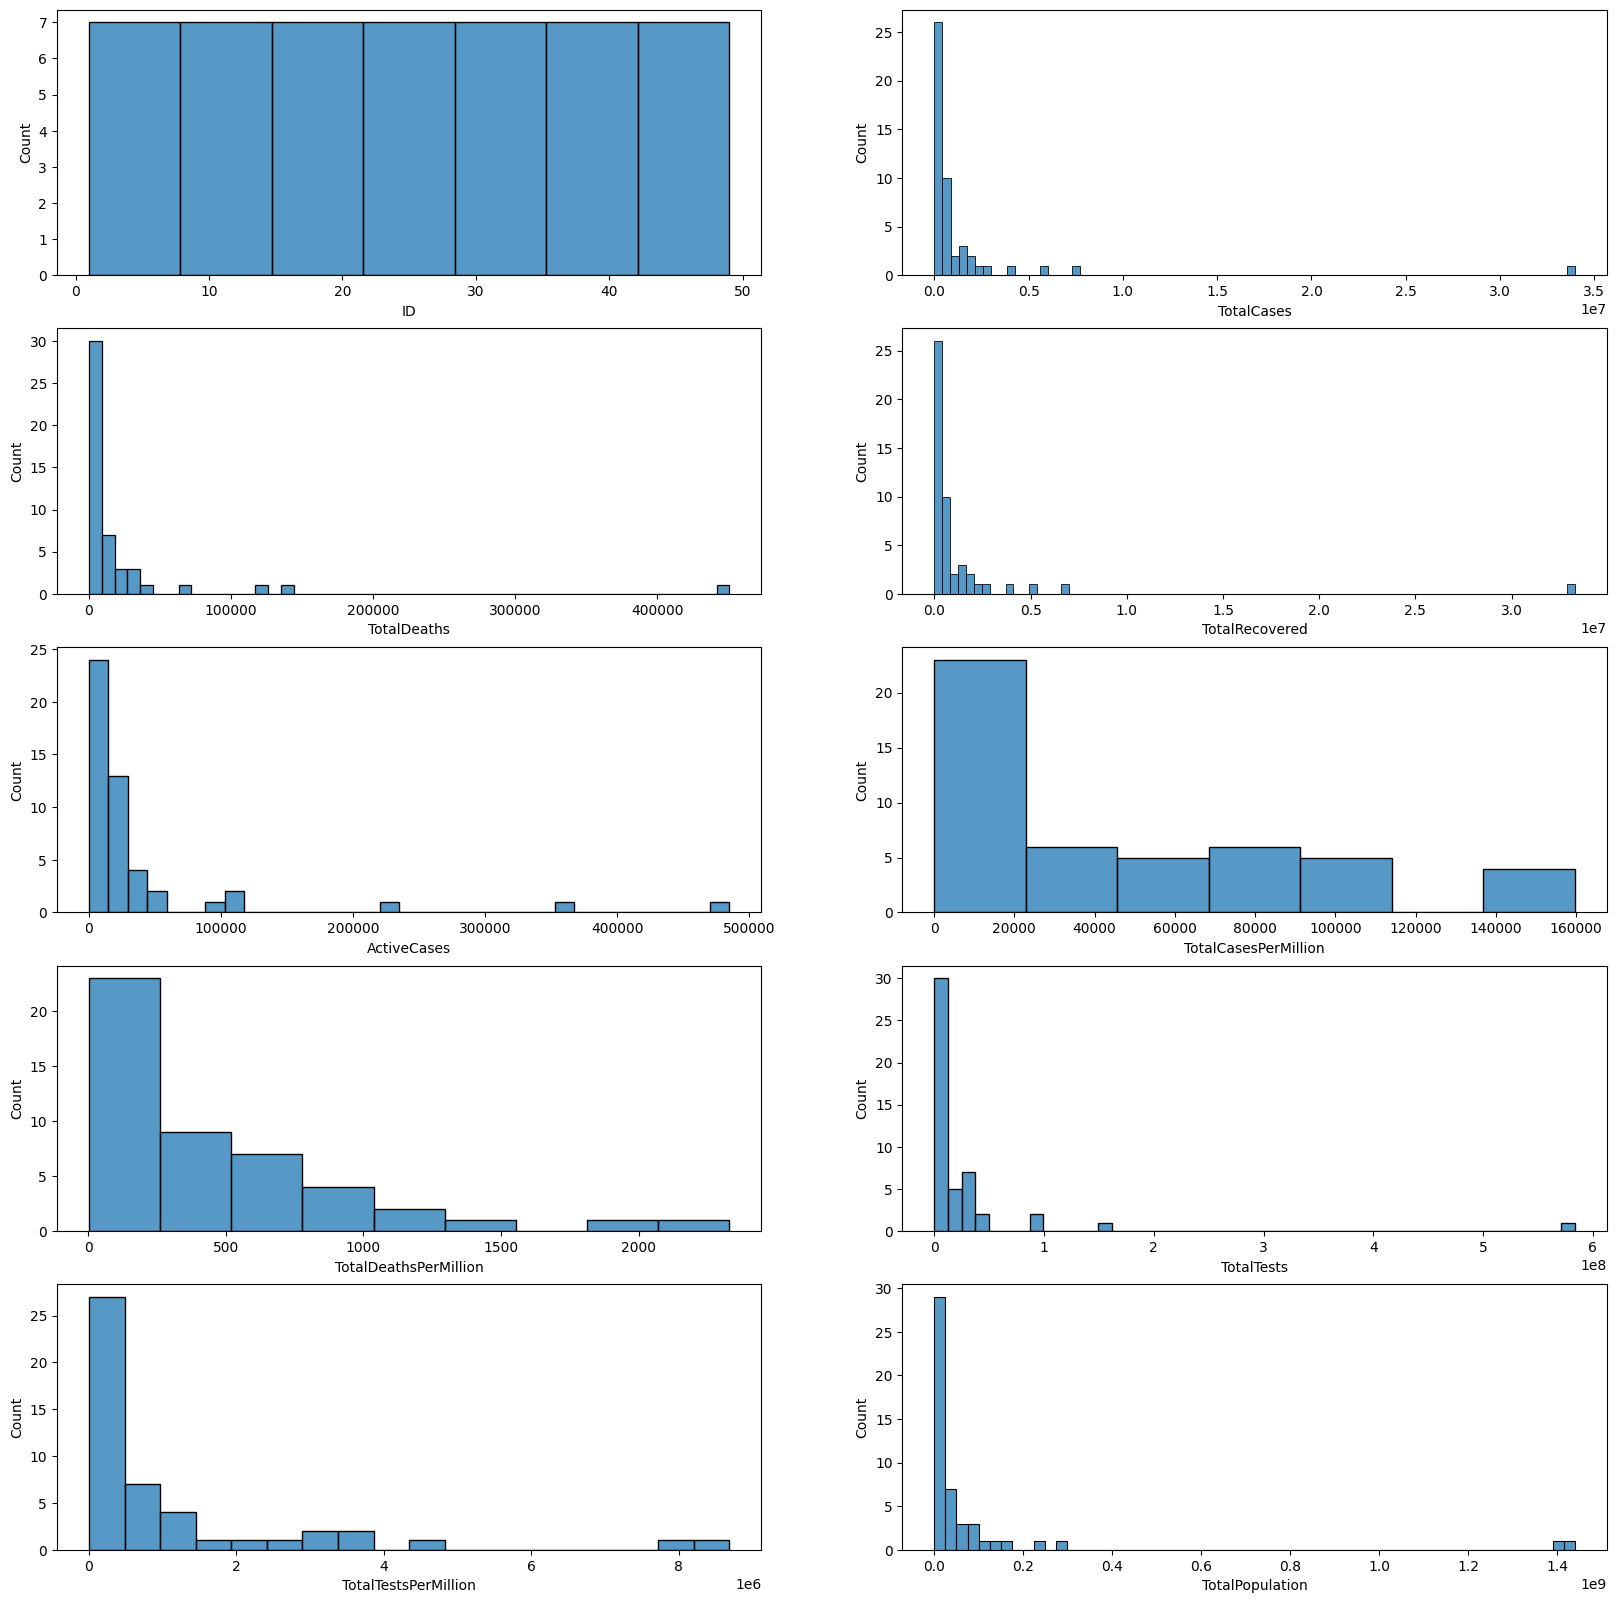

In [9]:
# Analyse univarié. 
fig, ax = plt.subplots(5,2, figsize = (20,20))
for i, subplots in zip(var_quanti, ax.flatten()) :
    sns.histplot(df[i], ax = subplots ,palette= 'pastel')
fig.show()

La plupart des variables semblent avoir une distribution similaire. La construction de certaines variables\
laisse penser qu'il est fortement possible d'avoir de la colinéarité parmi nos variables. Par exemple,\
les varaibles per million, peuvent facilement être réconstruites par les variables dites "per million" et\
le total de la population.\
De même,  le total des cas peut être fortement lié aux nombre de test réalisés et le total de morts par\
cette variable. 

In [10]:
# Analyse multivarié
df_quant = df.drop(columns='Country')

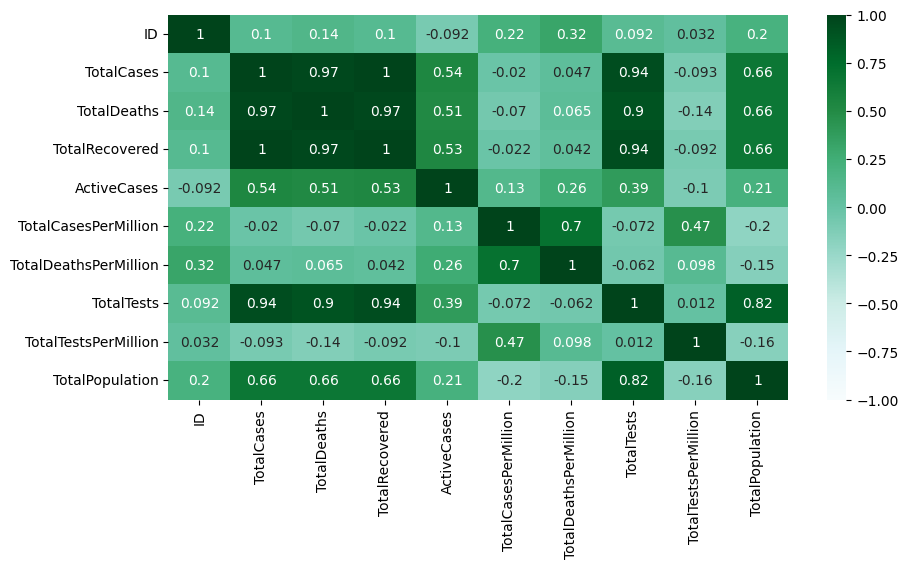

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df_quant.corr(method ='pearson'),vmax =1,vmin=-1, annot=True, cmap = "BuGn")
plt.show()

La matrice de corrélation nous montre la présence probable de colinéarité\
En effet, plusieurs variables présentent des scores de corrélation très\
élevés, voire à 1.\
Nous constatons cela par exemple avec la variable total cases et le total\
de test où nous avons une corrélation à 0.94. 

# (c) Préparation des données (recodages, normalisations, etc.) 

In [ ]:
# Nous enlevons ces variables car très corrélées avec d'autres variables.

df_pm = df.drop(columns = ["TotalTests", "TotalDeaths", "TotalCases"])
df_pm.head()

,ID,Country,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTestsPerMillion,TotalPopulation
0,1,Yemen,5921,1670,306,58.0,8651.0,30660443
1,2,Vietnam,782199,36908,8529,209.0,431850.0,98453377
2,3,Uzbekistan,174213,3153,5241,37.0,40425.0,34086135
3,4,UAE,731295,4481,73477,211.0,8687776.0,10042442
4,5,Turkey,6893476,484896,87077,774.0,1050928.0,85493959


In [23]:
df_pm_quant = df_pm.drop(columns='Country')

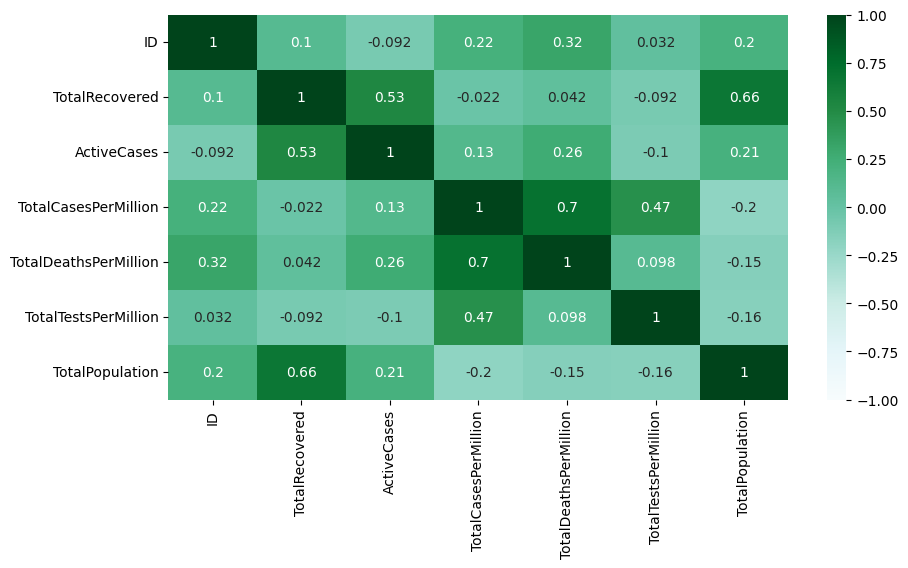

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df_pm_quant.corr(method ='pearson'),vmax =1,vmin=-1, annot=True, cmap = "BuGn")
plt.show()